# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

#Exercises

In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions in this notebook below and submit to your Github account

1. Is the distribution of body temperatures normal? 
 - Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
 - Is the sample size large? Are the observations independent?
 - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
2. Is the true population mean really 98.6 degrees F?
 - Would you use a one-sample or two-sample test? Why?
 - In this situation, is it appropriate to use the $t$ or $z$ statistic? 
 - Now try using the other test. How is the result be different? Why?
3. At what temperature should we consider someone's temperature to be "abnormal"?
 - Start by computing the margin of error and confidence interval.
 - Is there a significant difference between males and females in normal temperature?
4. What test did you use and why?
 - Write a story with your conclusion in the context of the original problem.
    

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

The dataset contains body temperatures and heart rate of 130 men and women. The sample size being greater than 30 we can apply z statistic. The mean is 98.2$^{\circ}$F which is not equal to the traditional value 98.6$^{\circ}$F suggested by  Carl Wunderlich. Let us test what the statistics say...

In [55]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [110]:
#Read csv file and convert to dataframe - body_temps
body_temps = pd.read_csv('~\data\human_body_temperature.csv')

In [111]:
body_temps.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Is the distribution of body temperatures normal?

From the distplot below the KDE is not a perfect bell shaped curve, but it is clear that the distribution resembles a bell curve. Even with only 130 observations in hand the data is a close match to a normal distribution. Therefore we can conclude that sample is **Normally Distributed**.

C:\Users\nikhi_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


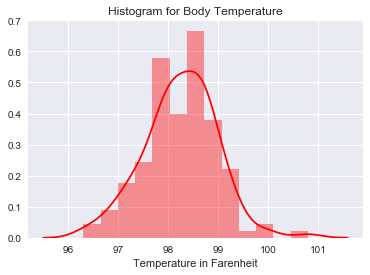

In [112]:
# Distplot with Kernel Density function 
g = sns.distplot(body_temps.temperature, axlabel='Temperature in Farenheit', color='r')
g.set_title('Histogram for Body Temperature')

# 2. Is the sample size large? Are the observations independent?

According to the **Central Limit Theorem** a sample with a size of equal to or more than 30 is considered good for statistic analysis. The sample size of the data set is sufficietly large with 130 values.

Independent Observations - ???

In [113]:
# Dataframe body_temps has 130 columns and 3 rows
body_temps.shape

(130, 3)

# 3. Is the true population mean really 98.6 degrees F?
 **a.** Would you use a one-sample or two-sample test? Why?
 
 **b.** In this situation, is it appropriate to use the tt or zz statistic?
 
 **c.** Now try using the other test. How is the result be different? Why?

In [115]:
#Calculate Mean and Standard deviation 
# Declare variable n - sample size
sample_mean, sample_std = body_temps.temperature.mean(), body_temps.temperature.std()
n = 130
sample_mean, sample_std

(98.24923076923078, 0.7331831580389454)

** a.**  One way to find out the population mean from sample means is to plot a ** Sampling Distribution of sample means. ** But for this the population size should be provided to derive decent number of samples, calculate their means and then draw a graph for the means obtained. 

The objective is to compare the sample mean to the normal body temperature which is 98.6$^{\circ}$ F. ** One-sample test** is used, because we are testing if the mean falls close to 98.6$^{\circ}$ F, rather than comparing temperatures of two groups (which is when a two-sample test is used).

Since the sample is 130 observations it is ** considerably large sample. ** According to the ** Central Limit Theorem ** a sample greater than 30 can be considered normally distributed even if the population is not normally distributed.

** b. ** In this case:
- the sample observations follow a ** Normal distribution **
- the sample size n is large (>30)
- population standard deviation is unknown **(σ)**.

Therefore it is appropriate to use a ** t-statistic **

To check if the population mean is 98.6$^{\circ}$ F, let us test for Hypothesis:

$H$o : Population mean(μ) = 98.6$^{\circ}$ F

$H$a : Population mean(μ) ≠ 98.6$^{\circ}$ F

Calculation of t-value:

**t = (x̄ - μ) / (s /√n)**

Significance level **α = 0.05**

Degrees of Freedom **130-1=129**

The two-tailed critical $t$ value for a significance level of 5% and 129 degrees of freedom is **1.98**

** t-table link** - http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

**If the t-statistic is less than -1.98 or greater than 1.98, then reject the Null Hypothesis**

In [116]:
# Calculating the t-value and p-value
sp.stats.ttest_1samp(body_temps.temperature,popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [117]:
# Detailed calculation using original formula (t = (x̄ - μ) / (s /√n))
pop_mean=98.6
t = (sample_mean-pop_mean)/(sample_std/n**(1/2))
t

-5.454823292364079

<img src = "1vs2.jpg">

**From the result above (t-statistic = -5.454, pvalue = 2.41), t-statistic is less than -1.980. Therefore we can reject the Null Hypothesis $H$o : Population mean(μ) = 98.6$^{\circ}$ F**

**c.** Using z statistic

$H$o : Population mean(μ) = 98.6$^{\circ}$ F

$H$a : Population mean(μ) ≠ 98.6$^{\circ}$ F

Significance level α = 0.05

The z value for a two-tailed normal distribution with 0.025 on both sides is **1.96** (z-value with .975 area in the body)

**If the z-statistic is less than -1.96 or greater than 1.96, then reject the Null Hypothesis**

Calculation of z-value:

**z = (x̄ - μ) / ( σ/√n)**

Note: Since σ (population standard deviation) is not provided, sample standard deviation (s) is used for calculating z-statistic


In [118]:
# Calculating z statistisc (z = (x̄ - μ) / ( σ/√n))
z = (sample_mean-pop_mean)/(sample_std/n**(1/2))
z

-5.454823292364079

The z-statistic -5.45 is much lesser than -1.96 (or) -5.45 doesn't fall in the range -1.96, 1.96. Therefore the **Null Hypothesis $H$o : Population mean(μ) = 98.6$^{\circ}$ F is rejected**

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

Assuming that most of the human body temperatures are normal, it is appropriate to infer that 95% area under the bell curve falls under normal temperature, anything outside that range can be considered abnormal.

Calculating a t-statistic interval range with 95% Confidence Interval:

**(x̄ + $t_{α/2,n−1}$(s/√n), x̄ - $t_{α/2,n−1}$(s/√n))**

**Margin of error - $t_{α/2,n−1}$(s/√n)**

t-value for a 95% CI with 129 degerees of freedom is **1.984**

** t-table link** - http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

In [119]:
# Margin of Error calculation
margin_of_error = 1.984*(sample_std/n**(1/2))
margin_of_error

0.12757996300637575

In [120]:
# Calculation of upper and lower limits in the interval
lower_limit = sample_mean-margin_of_error
upper_limit = sample_mean+margin_of_error
lower_limit, upper_limit

(98.12165080622441, 98.37681073223715)

The interval is **(98.12$^{\circ}$ F, 98.37$^{\circ}$ F).** 

** Anything below 98.12$^{\circ}$ F and more than 98.37$^{\circ}$ F is "abnormal".**

# 5. Is there a significant difference between males and females in normal temperature?
**a.** What test did you use and why?

**b.** Write a story with your conclusion in the context of the original problem.


To check if there is a considerable difference between means of two groups **ANOVA (Analysis of Variance)** is used. 

If the variation between the groups is much larger than variation within the groups then there must be a significant effect of an experiment on the group/s.

In other words if the variation between male and female temperatures is huge, then we can conclude that there is a significant difference.

In [129]:
# Creating two new dataframes 'body_temps_male' - consisting male gender data  and 
#'body_temps_female' - consisting of female gender data
body_temps_male = body_temps.loc[body_temps['gender']=='M']
body_temps_female = body_temps.loc[body_temps['gender']=='F']

In [150]:
# Calculating statistics like Mean, Standard deviation, Variance
# Also finding no of columns in body_temps_male - len()
male_mean = body_temps_male.temperature.mean()
male_std = body_temps_male.temperature.std()
male_var = body_temps_male.temperature.var()
male_mean,male_std, male_var, len(body_temps_male)

(98.1046153846154, 0.6987557623265908, 0.488259615384615, 65)

In [151]:
# Calculating statistics like Mean, Standard deviation, Variance
# Also finding no of columns in body_temps_female - len()
female_mean = body_temps_female.temperature.mean()
female_std = body_temps_female.temperature.std()
female_var = body_temps_female.temperature.var()
female_mean, female_std, female_var, len(body_temps_female)

(98.39384615384613, 0.7434877527313665, 0.5527740384615375, 65)

To check if there exists a significant difference between normal temperatures of males and females, let us define the Hypethesis testing:

**$H$o: There isn't a significant difference between x̄$_{male}$ and x̄$_{female}$ **

**$H$a: There is a significant difference between x̄$_{male}$ and x̄$_{female}$ **

**Significance Level = 0.05**

In [149]:
# calculating f-statistic
sp.stats.f_oneway(body_temps_male.temperature, body_temps_female.temperature)

F_onewayResult(statistic=5.2232110282402724, pvalue=0.023931883122395092)

**Degrees of Freedom:**

- m = no. of groups (2 in this case - male, female
    
- n = no. of values in each group (65)

     1. Sum of squares within the groups-> m(n-1)  **degrees of freedom = 2(65-1) = 128**  
        
     2. Sum of squares between the groups-> m-1    **degrees of freedom = (2-1) = 1**
     
     
**From the distribution of F-statistic for 1 degrees of freedom for Sum of squares between the groups and 128 degrees of freedom 

**for Sum of squares within the group with a significance level equal to 0.05 is 3.9201**

F-table link http://www.socr.ucla.edu/applets.dir/f_table.html

**The F-statistic 5.2232 is greater than 3.9201, therefore we can reject the Null Hypothesis $H$o: There isn't a significant**

**difference between x̄$_{male}$ and x̄$_{female}$ **